In [37]:
# Imports #
# List of Cufflinks Themes :  ['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans'] #

import cufflinks as cf
cf.go_offline()
cf.set_config_file(theme='solar',sharing='public',offline=True) 
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import requests 
import os
import io
from pathlib import Path
from dotenv import load_dotenv

# Read Mapbox API

load_dotenv()
MAPBOX_API_KEY = os.getenv('MAPBOX_API_KEY')
px.set_mapbox_access_token(MAPBOX_API_KEY)


In [38]:
# Download Eth Energy Consumption Data #

print('https://static.dwcdn.net/data/ocIBH.csv')
req = requests.get('https://static.dwcdn.net/data/ocIBH.csv')
url_content = req.content
csv_file = open('eth_df.csv', 'wb')
csv_file. write(url_content)
csv_file

https://static.dwcdn.net/data/ocIBH.csv


<_io.BufferedWriter name='eth_df.csv'>

In [39]:
# Read the ETH data into a Pandas DataFrame #

file_path = Path('eth_df.csv')
eth_df = pd.read_csv(file_path)
eth_df.head(10)


,Date,Estimated TWh per Year,Minimum TWh per Year
0,2017/5/20,2.338304,2.131205
1,2017/5/21,2.331936,2.229735
2,2017/5/22,2.406776,2.275484
3,2017/5/23,2.479116,2.227113
4,2017/5/24,2.558065,2.259307
5,2017/5/25,2.646793,2.264728
6,2017/5/26,2.594669,2.265016
7,2017/5/27,2.405447,2.337235
8,2017/5/28,2.476710,2.324490
9,2017/5/29,2.554142,2.420612


In [40]:
# Create_line_chart function #
def create_line_chart(data, title, x, xlabel, y, ylabel, color):
   
    chart = data.hvplot(title = title, kind = 'line', x = x, xlabel = xlabel, y = y, ylabel = ylabel, color = color) 
    return chart


In [41]:
# Plotting Estimated ETH Consumption Line Chart #

create_line_chart(eth_df ,'Estimated TWh per Year', 'Date', 'Timeline 2017 - 2021', 'Estimated TWh per Year', 'TWh per Year', 'lime')


:Curve   [Date]   (Estimated TWh per Year)

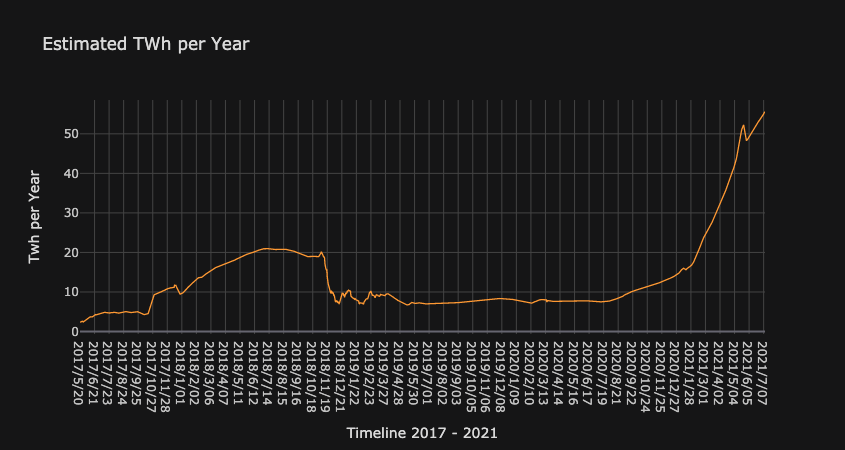

In [52]:
# Plotting Estimated ETH Consumption Line Chart in Cufflinks #


eth_estimated_consumtion= eth_df.iplot(kind = 'line', theme = 'solar', title = 'Estimated TWh per Year', y = 'Estimated TWh per Year', yTitle = 'Twh per Year', x = 'Date' , xTitle = 'Timeline 2017 - 2021' )

In [43]:
# Plotting Minimum ETH Consumption Line Chart #

create_line_chart(eth_df ,'Minimum TWh per Year', 'Date', 'Timeline 2017 - 2021', 'Minimum TWh per Year', 'TWh per Year', 'orange')

:Curve   [Date]   (Minimum TWh per Year)

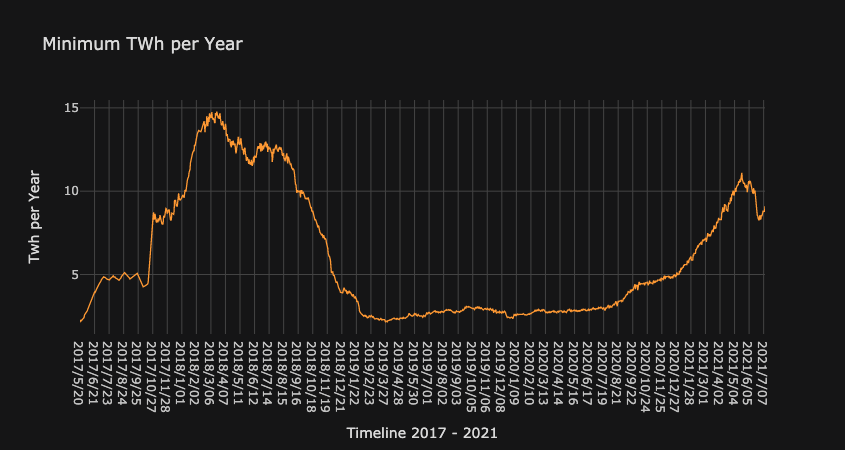

In [51]:
# Plotting Minimum ETH Consumption Line Chart in Cufflinks #


eth_min_consumtion= eth_df.iplot(kind = 'line', theme = 'solar', title = 'Minimum TWh per Year', y = 'Minimum TWh per Year', yTitle = 'Twh per Year', x = 'Date', xTitle = 'Timeline 2017 - 2021' )

In [45]:
# Combining Estimated and Minimum TWh Charts #

eth_df.hvplot(title = 'Ethereum Energy Consumption', kind = 'line', xlabel = 'Timeline 2017 - 2021', ylabel = 'TWh per Year', )

:NdOverlay   [Variable]
   :Curve   [index]   (value)

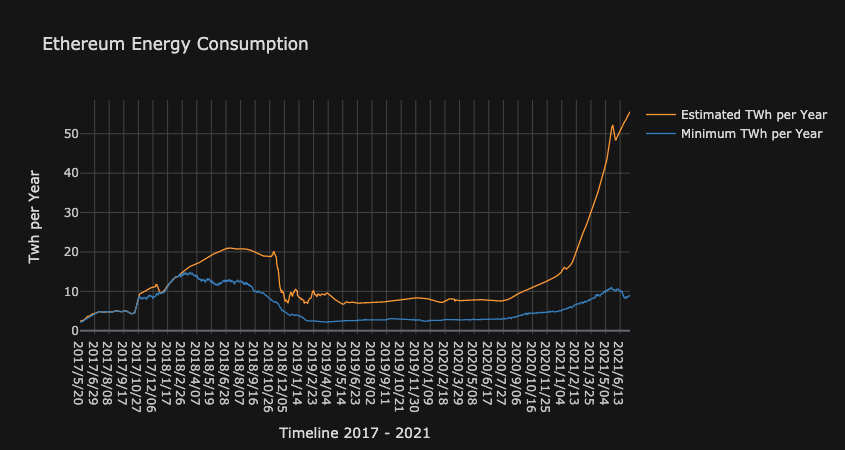

In [46]:
# Plotting Estimated ETH Consumption Line Chart Estimated and Minimum Cufflinks #

eth_combined_chart = eth_df.iplot(kind = 'line', theme = 'solar', title = 'Ethereum Energy Consumption', yTitle = 'Twh per Year', x = 'Date', xTitle = 'Timeline 2017 - 2021' )


In [47]:
# Read the ETH Consumtion data per Country in TWh reletive to ETH into a Pandas DataFrame #

url_eth_consumption_data = 'https://static.dwcdn.net/data/3yylZ.csv'

r = requests.get(url_eth_consumption_data)
if r.ok:
    data = r.content.decode('utf8')
    eth_consumption_df = pd.read_csv(io.StringIO(data))
    



In [48]:
# Read Data Frame of ETH GLOBAL CONSUMPTION #

eth_consumption_df.head(7)

,Rank,Country,TWh per Year
0,52,52. Singapore,52.60
1,51,51. Greece,54.30
2,50,50. Romania,55.30
3,49,49. Ethereum,55.59
4,48,48. Uzbekistan,57.70
5,47,47. Israel,60.50
6,46,46. Switzerland,63.30


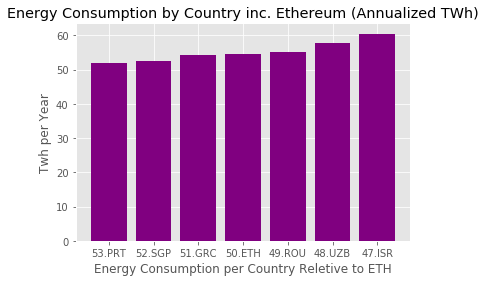

In [49]:
# ETH plotting Bar Chart #

%matplotlib inline
plt.style.use('ggplot')

x = ['53.PRT', '52.SGP', '51.GRC', '50.ETH', '49.ROU', '48.UZB', '47.ISR']
energy = [51.90, 52.60, 54.30, 54.47, 55.30, 57.70, 60.50]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color = 'purple')
plt.xlabel("Energy Consumption per Country Reletive to ETH")
plt.ylabel("Twh per Year")
plt.title("Energy Consumption by Country inc. Ethereum (Annualized TWh)")

plt.xticks(x_pos, x)

plt.show()

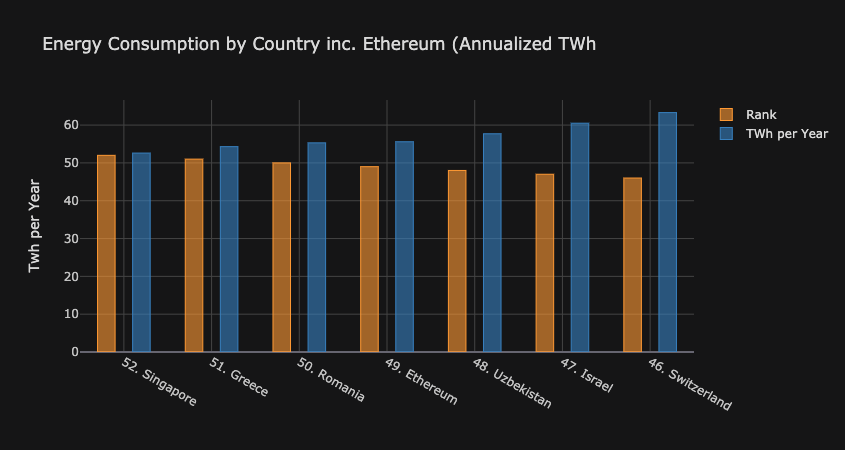

In [50]:
# Plotting Eth barchart in Cufflinks #

data = eth_consumption_df

eth_consumption_chart = data.iplot(kind = 'bar', theme = 'solar', bargroupgap = .5, title = 'Energy Consumption by Country inc. Ethereum (Annualized TWh', yTitle = 'Twh per Year', x = 'Country' )

